In [35]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
data=pd.read_csv("data1.csv")

In [2]:
data.head()

,x,y
0,17,94
1,13,73
2,12,59
3,15,80
4,16,93


In [3]:
data.info()
n=120

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       120 non-null    int64
 1   y       120 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [4]:
x=data.iloc[:,0].values
y=data.iloc[:,1].values

In [5]:
x

array([17, 13, 12, 15, 16, 14, 16, 16, 18, 19, 17, 13, 12, 15, 16, 14, 16,
       16, 18, 19, 17, 13, 12, 15, 16, 14, 16, 16, 18, 19, 17, 13, 12, 15,
       16, 14, 16, 16, 18, 19, 17, 13, 12, 15, 16, 14, 16, 16, 18, 19, 17,
       13, 12, 15, 16, 14, 16, 16, 18, 19, 17, 13, 12, 15, 16, 14, 16, 16,
       18, 19, 17, 13, 12, 15, 16, 14, 16, 16, 18, 19, 17, 13, 12, 15, 16,
       14, 16, 16, 18, 19, 17, 13, 12, 15, 16, 14, 16, 16, 18, 19, 17, 13,
       12, 15, 16, 14, 16, 16, 18, 19, 17, 13, 12, 15, 16, 14, 16, 16, 18,
       19])

In [6]:
y

array([94, 73, 59, 80, 93, 85, 66, 79, 77, 91, 94, 73, 59, 80, 93, 85, 66,
       79, 77, 91, 94, 73, 59, 80, 93, 85, 66, 79, 77, 91, 94, 73, 59, 80,
       93, 85, 66, 79, 77, 91, 94, 73, 59, 80, 93, 85, 66, 79, 77, 91, 94,
       73, 59, 80, 93, 85, 66, 79, 77, 91, 94, 73, 59, 80, 93, 85, 66, 79,
       77, 91, 94, 73, 59, 80, 93, 85, 66, 79, 77, 91, 94, 73, 59, 80, 93,
       85, 66, 79, 77, 91, 94, 73, 59, 80, 93, 85, 66, 79, 77, 91, 94, 73,
       59, 80, 93, 85, 66, 79, 77, 91, 94, 73, 59, 80, 93, 85, 66, 79, 77,
       91])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [9]:
x_train

array([16, 14, 14, 13, 16, 13, 18, 16, 16, 15, 16, 13, 12, 12, 18, 18, 16,
       19, 17, 16, 14, 19, 19, 17, 17, 15, 14, 19, 17, 12, 18, 16, 18, 19,
       16, 16, 17, 16, 15, 16, 16, 16, 15, 19, 15, 12, 13, 14, 13, 15, 16,
       17, 16, 15, 15, 16, 15, 15, 16, 14, 17, 13, 14, 12, 16, 16, 14, 14,
       13, 13, 16, 14, 12, 12, 13, 19, 16, 16, 16, 16, 14, 19, 18, 18])

In [10]:
x_test

array([18, 13, 19, 16, 12, 16, 17, 15, 18, 19, 16, 12, 12, 16, 12, 18, 15,
       16, 16, 16, 17, 18, 16, 13, 17, 17, 17, 13, 16, 14, 18, 19, 19, 16,
       12, 16])

In [11]:
y_train

array([66, 85, 85, 73, 79, 73, 77, 66, 93, 80, 66, 73, 59, 59, 77, 77, 93,
       91, 94, 93, 85, 91, 91, 94, 94, 80, 85, 91, 94, 59, 77, 66, 77, 91,
       93, 93, 94, 79, 80, 93, 66, 93, 80, 91, 80, 59, 73, 85, 73, 80, 79,
       94, 79, 80, 80, 79, 80, 80, 66, 85, 94, 73, 85, 59, 93, 79, 85, 85,
       73, 73, 79, 85, 59, 59, 73, 91, 79, 79, 93, 66, 85, 91, 77, 77])

In [12]:
y_test

array([77, 73, 91, 93, 59, 93, 94, 80, 77, 91, 66, 59, 59, 66, 59, 77, 80,
       66, 79, 66, 94, 77, 79, 73, 94, 94, 94, 73, 93, 85, 77, 91, 91, 66,
       59, 79])

In [13]:
y_mean=np.mean(y_train)
x_mean=np.mean(x_train)

In [14]:
def MAE(y_test,y_pred,n):
    error=0
    for i in range(n):
        error+=abs(y_test[i]-y_pred[i])/n
    return error

In [15]:
def RMSE(y_test,y_pred,n):
    error=0
    for i in range (n):
        error+=math.sqrt(((y_test[i]-y_pred[i])**2)/n)
    return error

In [16]:
#Model1 
num=0
denom=0
for i in range (84):
    num+=x_train[i]*y_train[i] - y_mean*x_train[i]
    denom+=x_train[i]**2 - x_mean*x_train[i]
m=num/denom
c=y_mean-(m*x_mean)


In [17]:
m

2.993993993993982

In [18]:
c

33.83118833118852

In [19]:
y_pred=m*x + c

In [20]:
y_pred

array([84.72908623, 72.75311025, 69.75911626, 78.74109824, 81.73509224,
       75.74710425, 81.73509224, 81.73509224, 87.72308022, 90.71707422,
       84.72908623, 72.75311025, 69.75911626, 78.74109824, 81.73509224,
       75.74710425, 81.73509224, 81.73509224, 87.72308022, 90.71707422,
       84.72908623, 72.75311025, 69.75911626, 78.74109824, 81.73509224,
       75.74710425, 81.73509224, 81.73509224, 87.72308022, 90.71707422,
       84.72908623, 72.75311025, 69.75911626, 78.74109824, 81.73509224,
       75.74710425, 81.73509224, 81.73509224, 87.72308022, 90.71707422,
       84.72908623, 72.75311025, 69.75911626, 78.74109824, 81.73509224,
       75.74710425, 81.73509224, 81.73509224, 87.72308022, 90.71707422,
       84.72908623, 72.75311025, 69.75911626, 78.74109824, 81.73509224,
       75.74710425, 81.73509224, 81.73509224, 87.72308022, 90.71707422,
       84.72908623, 72.75311025, 69.75911626, 78.74109824, 81.73509224,
       75.74710425, 81.73509224, 81.73509224, 87.72308022, 90.71

In [21]:
y_test

array([77, 73, 91, 93, 59, 93, 94, 80, 77, 91, 66, 59, 59, 66, 59, 77, 80,
       66, 79, 66, 94, 77, 79, 73, 94, 94, 94, 73, 93, 85, 77, 91, 91, 66,
       59, 79])

In [22]:
MAE(y_test,y_pred,36)

11.56411173077839

In [23]:
RMSE(y_test,y_pred,36)

69.38467038467034

In [24]:
#Model2
num2=0
denom2=0
r=0
n2=84
Sx=0
Sy=0
for i in range(84):
    num2+=(x_train[i]-x_mean)*(y_train[i]-y_mean)
    denom2+=math.sqrt(((x_train[i]-x_mean)**2)*((y_train[i]-y_mean)**2))
    Sx+=(math.sqrt((x_train[i]-x_mean)**2))/n-1
    Sy+=(math.sqrt((y_train[i]-y_mean)**2))/n-1
r=num2/denom2 

b1=r*(Sy/Sx)
b0=y_mean - (b1*x_mean)    

In [25]:
r

0.7233623548922063

In [26]:
b0

69.66008784373622

In [27]:
b1

0.6824520899586467

In [28]:
y_pred2= b0+ (b1*x)

In [29]:
y_pred2

array([81.26177337, 78.53196501, 77.84951292, 79.89686919, 80.57932128,
       79.2144171 , 80.57932128, 80.57932128, 81.94422546, 82.62667755,
       81.26177337, 78.53196501, 77.84951292, 79.89686919, 80.57932128,
       79.2144171 , 80.57932128, 80.57932128, 81.94422546, 82.62667755,
       81.26177337, 78.53196501, 77.84951292, 79.89686919, 80.57932128,
       79.2144171 , 80.57932128, 80.57932128, 81.94422546, 82.62667755,
       81.26177337, 78.53196501, 77.84951292, 79.89686919, 80.57932128,
       79.2144171 , 80.57932128, 80.57932128, 81.94422546, 82.62667755,
       81.26177337, 78.53196501, 77.84951292, 79.89686919, 80.57932128,
       79.2144171 , 80.57932128, 80.57932128, 81.94422546, 82.62667755,
       81.26177337, 78.53196501, 77.84951292, 79.89686919, 80.57932128,
       79.2144171 , 80.57932128, 80.57932128, 81.94422546, 82.62667755,
       81.26177337, 78.53196501, 77.84951292, 79.89686919, 80.57932128,
       79.2144171 , 80.57932128, 80.57932128, 81.94422546, 82.62

In [30]:
y_test

array([77, 73, 91, 93, 59, 93, 94, 80, 77, 91, 66, 59, 59, 66, 59, 77, 80,
       66, 79, 66, 94, 77, 79, 73, 94, 94, 94, 73, 93, 85, 77, 91, 91, 66,
       59, 79])

In [31]:
RMSE(y_test,y_pred2,36)

62.55283705909252

In [32]:
MAE(y_test,y_pred2,36)

10.425472843182087

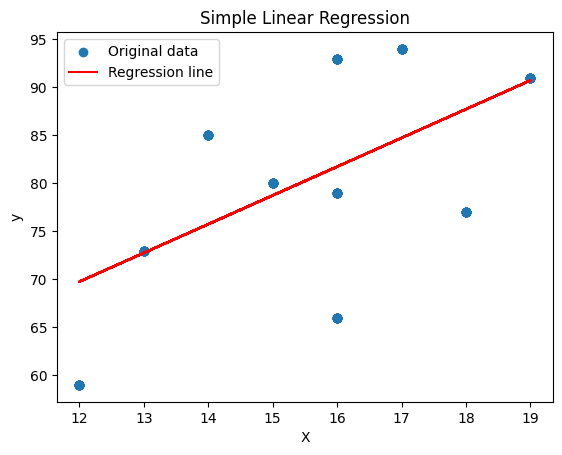

In [38]:
plt.scatter(x, y, label='Original data')
plt.plot(x, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()